In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./data/tax_data_2020.csv")
df = df[df.zipcode != 0]
df.head(3)

,STATEFIPS,STATE,zipcode,agi_stub,N1,mars1,MARS2,MARS4,ELF,CPREP,...,N85300,A85300,N11901,A11901,N11900,A11900,N11902,A11902,N12000,A12000
6,1,AL,35004,1,1460.0,1010.0,200.0,210.0,1340.0,40.0,...,0.0,0.0,110.0,80.0,1210.0,2807.0,1210.0,2795.0,0.0,0.0
7,1,AL,35004,2,1400.0,760.0,280.0,310.0,1310.0,40.0,...,0.0,0.0,190.0,194.0,1210.0,3378.0,1200.0,3335.0,30.0,62.0
8,1,AL,35004,3,1020.0,460.0,350.0,190.0,970.0,30.0,...,0.0,0.0,230.0,357.0,800.0,2131.0,790.0,2119.0,0.0,0.0


In [3]:
def toMillion(amount):
    return round(amount / 1000000, 2)

def toBillion(amount):
    return round(amount / 1000000000, 2)

def toTrillion(amount):
    return round(amount / 1000000000000, 10)

### Look into method of how returns are being filed

In [8]:
total_number_electronic_returns = df.ELF.sum()
total_number_computer_prepared_returns = df.CPREP.sum()
total_number_paid_preparer_returns = df.PREP.sum()
total_number_dir_dep_returns = df.DIR_DEP.sum()
total_number_virtual_currency_indicator_returns = df.VRTCRIND.sum()
total_number_volunteer_prepared_returns = df.TOTAL_VITA.sum()

total_number_returns = df.N1.sum()

In [11]:
print('% of total returns filed as electronic returns: ', round(total_number_electronic_returns/total_number_returns*100,2))
print('% of total returns filed as computer prepared returns: ', round(total_number_computer_prepared_returns/total_number_returns*100,2))
print('% of total returns filed with paid preparer''s signature returns: ', round(total_number_paid_preparer_returns/total_number_returns*100,2))
print('% of total returns filed as direct deposit returns: ', round(total_number_dir_dep_returns/total_number_returns*100,2))
print('% of total returns filed as virtual currency indicator returns: ', round(total_number_virtual_currency_indicator_returns/total_number_returns*100,2))
print('% of total returns filed as volunteer prepared returns: ', round(total_number_volunteer_prepared_returns/total_number_returns*100,2))

% of total returns filed as electronic returns:  92.74
% of total returns filed as computer prepared returns:  2.93
% of total returns filed with paid preparers signature returns:  52.5
% of total returns filed as direct deposit returns:  67.41
% of total returns filed as virtual currency indicator returns:  1.35
% of total returns filed as volunteer prepared returns:  1.09


#### Do certain methods correlate with different income groups?

In [12]:
gp = df.groupby(['agi_stub'])[['N1','ELF','CPREP','PREP','DIR_DEP','VRTCRIND','TOTAL_VITA']].sum()
gp

,N1,ELF,CPREP,PREP,DIR_DEP,VRTCRIND,TOTAL_VITA
agi_stub,,,,,,,
1,50434370.0,46004120.0,1987100.0,24507300.0,35930020.0,531890.0,1029290.0
2,38987940.0,36420600.0,1159560.0,19254330.0,30144060.0,485250.0,534440.0
3,22584830.0,21059050.0,613910.0,11966920.0,15962870.0,340120.0,130300.0
4,14269770.0,13297410.0,325980.0,7941570.0,9388800.0,186310.0,22800.0
5,22379400.0,20929320.0,461530.0,12840550.0,12383950.0,398930.0,6720.0
6,9270090.0,8746440.0,85340.0,6397620.0,2649690.0,197230.0,50.0


In [13]:
gp['percent_ELF'] = round(gp.ELF/gp.N1*100,2)
gp['percent_CPREP'] = round(gp.CPREP/gp.N1*100,2)
gp['percent_PREP'] = round(gp.PREP/gp.N1*100,2)
gp['percent_DIR_DEP'] = round(gp.DIR_DEP/gp.N1*100,2)
gp['percent_VRTCRIND'] = round(gp.VRTCRIND/gp.N1*100,2)
gp['percent_TOTAL_VITA'] = round(gp.TOTAL_VITA/gp.N1*100,2)
gp['brackets'] = [1,2,3,4,5,6]
gp

,N1,ELF,CPREP,PREP,DIR_DEP,VRTCRIND,TOTAL_VITA,percent_ELF,percent_CPREP,percent_PREP,percent_DIR_DEP,percent_VRTCRIND,percent_TOTAL_VITA,brackets
agi_stub,,,,,,,,,,,,,,
1,50434370.0,46004120.0,1987100.0,24507300.0,35930020.0,531890.0,1029290.0,91.22,3.94,48.59,71.24,1.05,2.04,1
2,38987940.0,36420600.0,1159560.0,19254330.0,30144060.0,485250.0,534440.0,93.42,2.97,49.39,77.32,1.24,1.37,2
3,22584830.0,21059050.0,613910.0,11966920.0,15962870.0,340120.0,130300.0,93.24,2.72,52.99,70.68,1.51,0.58,3
4,14269770.0,13297410.0,325980.0,7941570.0,9388800.0,186310.0,22800.0,93.19,2.28,55.65,65.80,1.31,0.16,4
5,22379400.0,20929320.0,461530.0,12840550.0,12383950.0,398930.0,6720.0,93.52,2.06,57.38,55.34,1.78,0.03,5
6,9270090.0,8746440.0,85340.0,6397620.0,2649690.0,197230.0,50.0,94.35,0.92,69.01,28.58,2.13,0.00,6


Text(0.5, 1.0, 'Tax Return type percentage by bracket')

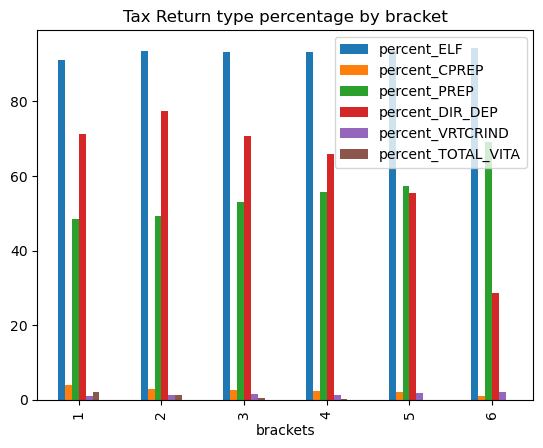

In [14]:
gp.plot.bar(x='brackets', y=['percent_ELF','percent_CPREP','percent_PREP',
                             'percent_DIR_DEP','percent_VRTCRIND','percent_TOTAL_VITA'])
plt.title('Tax Return type percentage by bracket')

Text(0.5, 1.0, 'Tax Return type percentage by bracket')

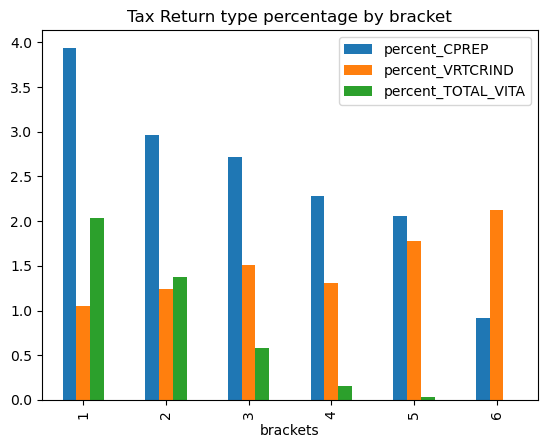

In [15]:
gp.plot.bar(x='brackets', y=['percent_CPREP','percent_VRTCRIND','percent_TOTAL_VITA'])
plt.title('Tax Return type percentage by bracket')

Text(0.5, 1.0, 'Tax Return type percentage by bracket')

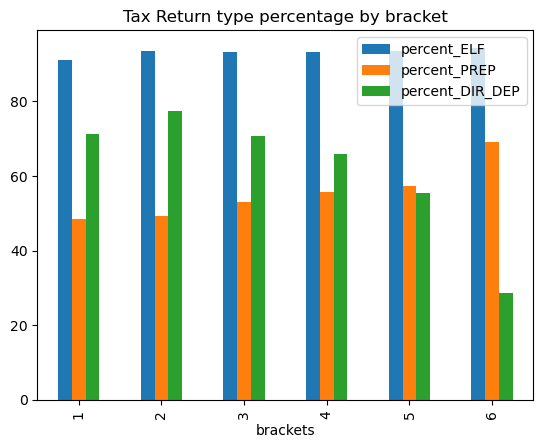

In [16]:
gp.plot.bar(x='brackets', y=['percent_ELF','percent_PREP',
                             'percent_DIR_DEP'])
plt.title('Tax Return type percentage by bracket')

Could look into direct deposit returns more as they seem to differ the most

again this seems hard to look into because we don't know exactly which returns are with direct deposit and which are without so looking at differences between the two groups is difficuly

### Group-by state

In [19]:
gp = df.groupby(['STATE'])[['N1','ELF','CPREP','PREP','DIR_DEP','VRTCRIND','TOTAL_VITA']].sum()

In [20]:
gp['percent_ELF'] = round(gp.ELF/gp.N1*100,2)
gp['percent_CPREP'] = round(gp.CPREP/gp.N1*100,2)
gp['percent_PREP'] = round(gp.PREP/gp.N1*100,2)
gp['percent_DIR_DEP'] = round(gp.DIR_DEP/gp.N1*100,2)
gp['percent_VRTCRIND'] = round(gp.VRTCRIND/gp.N1*100,2)
gp['percent_TOTAL_VITA'] = round(gp.TOTAL_VITA/gp.N1*100,2)
gp

,N1,ELF,CPREP,PREP,DIR_DEP,VRTCRIND,TOTAL_VITA,percent_ELF,percent_CPREP,percent_PREP,percent_DIR_DEP,percent_VRTCRIND,percent_TOTAL_VITA
STATE,,,,,,,,,,,,,
AK,350020.0,321620.0,10780.0,142250.0,240370.0,6380.0,8050.0,91.89,3.08,40.64,68.67,1.82,2.30
AL,2162740.0,2008340.0,48500.0,1163170.0,1531510.0,18450.0,26210.0,92.86,2.24,53.78,70.81,0.85,1.21
AR,1295320.0,1213780.0,25180.0,705080.0,913060.0,11720.0,17220.0,93.71,1.94,54.43,70.49,0.90,1.33
AZ,3323210.0,3081250.0,99090.0,1532430.0,2244390.0,48640.0,57500.0,92.72,2.98,46.11,67.54,1.46,1.73
CA,18882640.0,17404330.0,689890.0,11523540.0,11312910.0,339160.0,169430.0,92.17,3.65,61.03,59.91,1.80,0.90
CO,2851670.0,2642380.0,82980.0,1262870.0,1874200.0,51890.0,26490.0,92.66,2.91,44.29,65.72,1.82,0.93
CT,1806830.0,1672860.0,55810.0,953680.0,1190260.0,25170.0,36010.0,92.59,3.09,52.78,65.88,1.39,1.99
DC,341400.0,311090.0,12310.0,150180.0,224910.0,7620.0,3840.0,91.12,3.61,43.99,65.88,2.23,1.12
DE,497120.0,455730.0,13850.0,232220.0,335840.0,5770.0,8980.0,91.67,2.79,46.71,67.56,1.16,1.81


Again we see there is not much variation by state